# Рынок заведений общественного питания Москвы

<a id="contents"></a>
### *Оглавление:*

1. [Загрузка данных](#loading)
2. [Цель работы](#goal)
3. [Задачи работы](#tasks)
4. [Предобработка данных](#cleaning)
5. [Анализ данных](#analysis)
    * [Соотношение видов объектов общественного питания по количеству](#analysis_1_1)
    * [Соотношение сетевых и несетевых заведений](#analysis_1_2)
    * [Распределение сетевых и несетевых заведений по типам](#analysis_1_3)
    * [Среднее количество посадочных мест по типам заведений](#analysis_1_4)
    * [Распределение посадочных мест сетевых заведений](#analysis_1_5)
    * [Выделение улиц, топ 10 улиц по количеству заведений и их принадленость районам](#analysis_1_6)
    * [Число улиц с одним объектом общественного питания](#analysis_1_7)
    * [Распределение количества посадочных мест на улицах с большим количеством заведений.](#analysis_1_8)
6. [Выводы](#conclusion)
7. [Презентация исследования](#presentation)

<a id="loading"></a>
## Загрузка данных
[К оглавлению](#contents)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO
import requests
spreadsheet_id = '1fLuGYw6Vsa1v86EipgmHF6ouVfySVYwVzQBn7cOk3pQ'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
districts = pd.read_csv(BytesIO(r.content))

In [2]:
rest = pd.read_csv('/datasets/rest_data.csv')
rest

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [3]:
districts

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


<a id="goal"></a> 
## Цель работы 
[К оглавлению](#contents)

*Дать рекомендации по открытию нового кафе.*

<a id="tasks"></a> 
## Задачи работы:

1. Проанализировать соотношение разных типов объектов общественного питания
2. Найти соотношение сетевых и несетевых заведений
3. Разобраться для какого объекта характерно сетевое распространение
4. Посмотреть, какое количество завежений характерно для сетевых заведений
5. Показать среднее количество посадочных мест для разного вида объектов
6. Найти топ 10 улиц по количеству объектов и соотвествующие им районы
7. Найти количество объектов с одной улицей и ответить на вопрос,в  каких районах находятся эти улицы
8. Посмотреть на распределение количества посадочных мест для топ 10 улиц.

<a id="cleaning"></a> 
## Предобработка данных
[К оглавлению](#contents)

In [4]:
rest.duplicated().sum()

0

In [5]:
rest.isnull().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Пропущенные значения и дубликаты отсутствуют

In [6]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


С типом данных всё в порядке

In [7]:
rest['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Заменим несколько названий типов объектов питания на более короткие и поменяем названия сетевых и несетевых заведений

In [8]:
rest['object_type'] = rest['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
rest['object_type'] = rest['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')
rest['chain'] = rest['chain'].str.replace('нет', 'несетевое').str.replace('да', 'сетевое')

In [9]:
rest['object_type'].value_counts()

кафе          6099
столовая      2587
ресторан      2285
фаст-фуд      1923
бар            856
буфет          585
кафетерий      398
закусочная     360
кулинария      273
Name: object_type, dtype: int64

In [10]:
rest['chain'].value_counts()

несетевое    12398
сетевое       2968
Name: chain, dtype: int64

In [11]:
rest

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,сетевое,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,сетевое,кафе,"город Москва, поселение Московский, Киевское ш...",36


В данном разделе проверили данные на дубликаты и пропущенные значения, чего обнаружено не было. Также произвели проверку типов данных - с ними всё в порядке. И заменили длинные названия столбца object_type на короткие: "предприятие быстрого обслуживания" на "фаст-фуд" и "магазин (отдел кулинарии)" на "кулинария". В столбце chain заменили "нет" на "несетевые" и "да" на "сетевые". Последние два действия совершили, чтобы в дальнейшем подписи к графикам были более понятными и не накладывались друг на друга.

<a id="analysis"></a> 
## Анализ данных
[К оглавлению](#contents)

<a id="analysis_1_1"></a> 
### Соотношение видов объектов общественного питания по количеству.

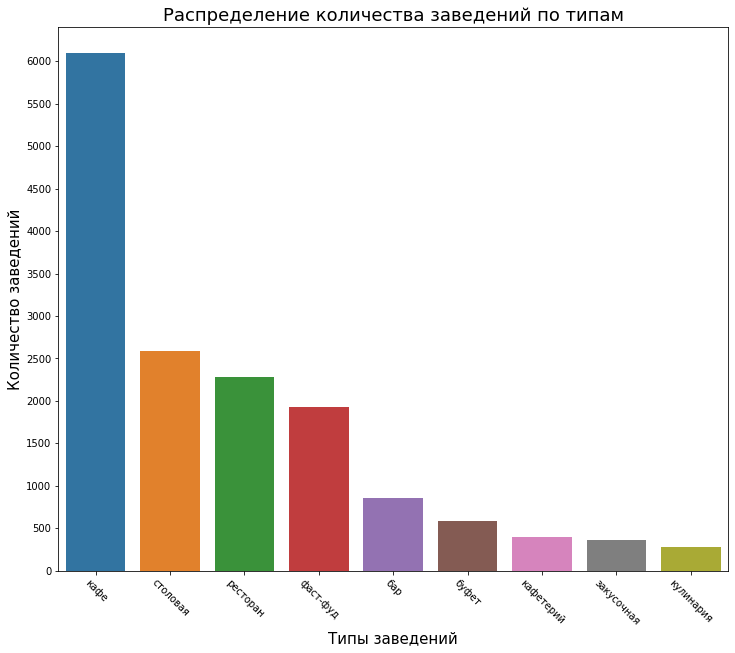

In [12]:
plt.subplots(figsize=(12, 10))
sns.countplot(x=rest['object_type'], data=rest, order=rest['object_type'].value_counts().index)
plt.title('Распределение количества заведений по типам', fontsize=18)
plt.xlabel('Типы заведений', fontsize=15)
plt.ylabel('Количество заведений', fontsize=15)
plt.xticks(rotation=315)
plt.yticks(np.arange(0, 6500, step=500))
plt.show()

Видим наибольшее количество заведений типа "кафе" в количестве более 6000, на втором месте столовая с количеством заведений чуть больше 2500, на третьем месте ресторан в количестве примерно 2300. На последнем месте отдел кулинарии магазина с около 300 заведений

По информации из википедии в кафе могут входить кофейни, которые имеют крайне ограниченный набор напитков и блюд, а значит их проще открыть. И кофейни не подпадают ни под одну другую категорию. Поэтому, вероятно, такой перекос в сторону кафе.

<a id="analysis_1_2"></a> 
### Соотношение сетевых и несетевых заведений
[К оглавлению](#contents)

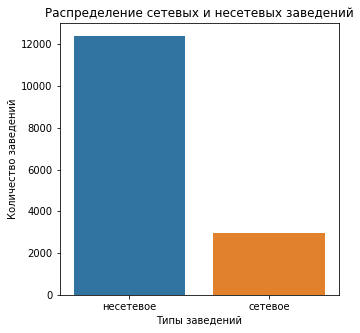

In [13]:
plt.subplots(figsize=(5, 5))
sns.countplot(x=rest['chain'], data=rest, order=rest['chain'].value_counts().index)
plt.title('Распределение сетевых и несетевых заведений', fontsize=12)
plt.xlabel('Типы заведений', fontsize=10)
plt.ylabel('Количество заведений', fontsize=10)
plt.show()

Количество несетевых заведений - чуть более 12000, сетевых же - чуть менее 3000. 

Вероятно, чтобы называться сетевым нужно открыть, минимум, два заведения под одним названием, что могут позволить себе далеко не все или не сразу. Другой вариант купить франшизу, но хотят открыть просто небольшое заведение, что скорее всего потребует меньших вложений. 

<a id="analysis_1_3"></a> 
### Распределение сетевых и несетевых заведений по типам
[К оглавлению](#contents)

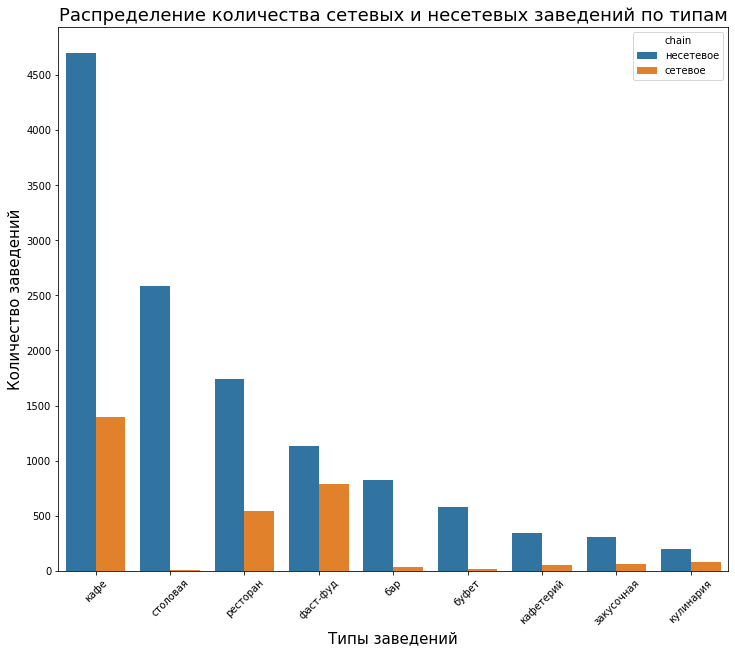

In [14]:
plt.subplots(figsize=(12, 10))
sns.countplot(x=rest['object_type'],hue='chain', data=rest, order=rest['object_type'].value_counts().index)
plt.title('Распределение количества сетевых и несетевых заведений по типам', fontsize=18)
plt.xlabel('Типы заведений', fontsize=15)
plt.ylabel('Количество заведений', fontsize=15)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 5000, step=500))
plt.show()

Наибольшее количество сетевых заведений у кафе, фаст-фуда и ресторанов

Посмотрим на соотношение сетевых к несетевым заведениям на разных видах объектов

In [15]:
not_chain = rest[rest['chain']=='несетевое']
chain = rest[rest['chain']=='сетевое']
not_chain_grouped = not_chain.groupby('object_type')['object_type'].count()
chain_grouped = chain.groupby('object_type')['object_type'].count()

In [16]:
ratio = (chain_grouped/not_chain_grouped).round(3).sort_values(ascending=False)
ratio

object_type
фаст-фуд      0.699
кулинария     0.400
ресторан      0.312
кафе          0.297
закусочная    0.184
кафетерий     0.150
бар           0.045
буфет         0.019
столовая      0.001
Name: object_type, dtype: float64

Наибольшее соотношение сетевых к несетевых заведениям у фаст-фуда, на втором месте кулинария. Ресторан и кафе - на третьем и четвёртом местах, соотвественно. Значит наиболее всего сетевое распространение характерно для фаст-фуда. В таких заведениях проще всего создать формулы готовых блюд с их быстрым приготовлением и снижением издержек на поставке продуктов.

Если говорить о столовых, то люди идут туда, в первую очередь, за недорогой едой, поэтому для владельцев было бы расточительством приводить разные заведения к одному виду. И с большой вероятностью в этих заведениях пытаются снизить расходы на всё, кроме продуктов. "Столовая" уже сообщает нам, что там недорого, и даже если заведение не будет узнаваемым, туда всё равно будут ходить. У баров же можно выделить несколько типов: заведения, в которые просто идут выпить, - такие бары не нуждаются в узнаваемости, и заведения, в которые идут на новыми напитками, коктейлями - таким барам сетевое распространение бы только вредило. Буфеты то, вероятно, не нуждаются в сетевом распространении, так как часто приурочены к другим заведениям или жилым домам, а значит посещать их в любом случае будут. 

<a id="analysis_1_4"></a> 
### Среднее количество посадочных мест по типам заведений
[К оглавлению](#contents)

In [17]:
chain

,id,object_name,chain,object_type,address,number
3,21894,ПИЦЦЕТОРИЯ,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,Брусника,сетевое,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,Алло Пицца,сетевое,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,Суши Wok,сетевое,фаст-фуд,"город Москва, Азовская улица, дом 3",7
18,58565,Тануки,сетевое,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,Шоколадница,сетевое,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,сетевое,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [18]:
rest.groupby('object_type')['number'].median().sort_values(ascending=False)

object_type
столовая      103
ресторан       80
бар            35
буфет          32
кафе           30
кафетерий       6
фаст-фуд        5
кулинария       0
закусочная      0
Name: number, dtype: int64

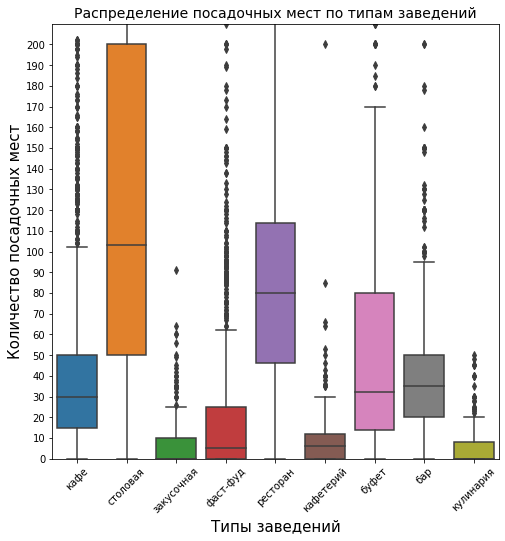

In [19]:
plt.subplots(figsize=(8, 8))
sns.boxplot(x='object_type', y='number', data=rest)
plt.title('Распределение посадочных мест по типам заведений', fontsize=14)
plt.xlabel('Типы заведений', fontsize=15)
plt.ylabel('Количество посадочных мест', fontsize=15)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 210, step=10))
plt.ylim([0, 210])
plt.show()

У столовых наблюдаем самое широкое типичное распределение посадочных мест - 50 процентов значений укладываются в промежуток 50 - 200 посадочных мест, - при этом медиана укладывается в 100 посадочных мест - это самое высокое значение среди всех типов заведений. На втором месте идут рестораны с основным количеством посадочных мест в 45 - 115 и медианой - 80. У кафе, бара и буфета медиана - 30 посадочных мест. Но буфеты могут достигать и 80 мест. При этом у закусочных и магазинов, по большей части нет посадочных мест или не больше 10. 

Теперь поговорим о возможных причинах такого распределения посадочных мест. 
У столовых наибольшее количество мест по причине наиболее широкого круга потребителей: туда ходят люди бедные и те, кто не хочет тратиться на еду, также туда могут выходить, чтобы поесть в обеденный перерыв, что может создавать большой единовременный поток людей. 
Рестораны же предлагают возможность неспешного размеренного отдыха, иногда, с длительным приготовлением эстетично выглядящей еды. В рестораны приходят, чтобы расслабиться, поговорить. И вся эта неспешная обстановка может требовать большого количества мест. 
В противовес ресторанам идут фаст-фуды с маленьким количеством мест. В них часто играет быстрая музыка, может быть достаточно тесно, и атмосфера часто располагает к тому, чтобы быстро поесть и уйти, а основной мотив зайти для человека - быстро поесть конкретной еды. Невысокая цена блюд требует от владельцев экономить на количестве мест, а психологические уловки вынуждают людей не задерживаться.
Буфеты могут быть схожи со столовыми с той разницей, что еда там воспринимается менее здоровой и больше предназначена для перекуса, поэтому в час-пик не требуется много мест. Или еда может быть куплена, чтобы съесть её в ближайшее время где-то у себя.
Кафе занимает нишу между столовой и рестораном. Туда приходят, чтобы поесть что-то необычное для привычной жизни и не спешить, как в фаст-фудах и столовых, но заплатить меньше, чем в ресторане. Поэтому приходится снижать количество мест относительно ресторана.
Если говорить и обарах, то их час-пик приходится на вечер пятницы и выходные. Нахождение посетителей регулируется уровнем их опьянения и желанием попробовать что-то новое. Последнее может вынуждать людей идти в другие бары, чтобы попробовать что-то ещё. С одной стороны такое количество мест продиктовано контролем издерже, а с другой стороны небольшим временем нахождения людей в конкретном месте. 
Кафетерий, закусочнаяи кулинария магазина предполагают очень короткое время нахождения в этих заведениях. Буквально, купил и ушёл, поэтому мест либо очень мало, либо их нет.

<a id="analysis_1_5"></a> 
### Распределение посадочных мест сетевых заведений
[К оглавлению](#contents)

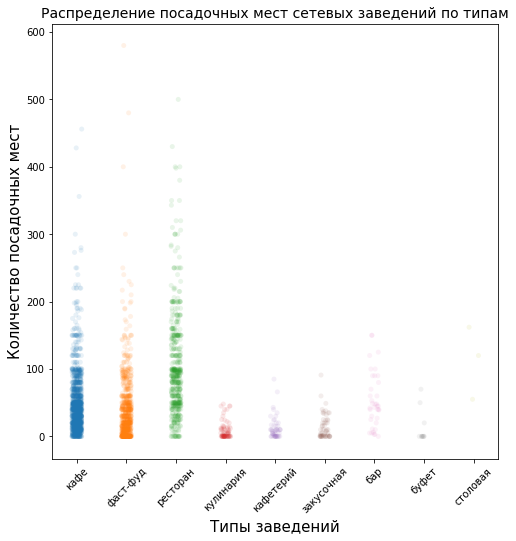

In [20]:
plt.subplots(figsize=(8, 8))
sns.stripplot(x='object_type', y='number', data=chain, alpha= 0.1)
plt.title('Распределение посадочных мест сетевых заведений по типам', fontsize=14)
plt.xlabel('Типы заведений', fontsize=15)
plt.ylabel('Количество посадочных мест', fontsize=15)
plt.xticks(rotation=45)
plt.show()

Посмотрели на распределение посадочных мест по разным типам сетевых заведений. У кафе, фаст-фудов и ресторанов больше других заведений плотность посадочных мест выше до 100 мест. У кулинарии, кафетерия и закусоынх большиснтво значений находится около нуля. У баров видим небольшое количество заведений с 50 местами. Сетевых буфетов, столовых почти нет, поэтому и значений нет.

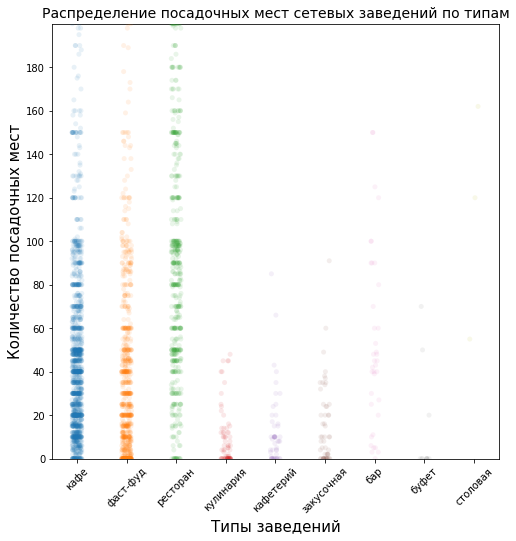

In [21]:
plt.subplots(figsize=(8, 8))
sns.stripplot(x='object_type', y='number', data=chain, alpha= 0.1)
plt.title('Распределение посадочных мест сетевых заведений по типам', fontsize=14)
plt.xlabel('Типы заведений', fontsize=15)
plt.ylabel('Количество посадочных мест', fontsize=15)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 200, step=20))
plt.ylim([0, 200])
plt.show()

Взглянули на распределение поближе. У кафе видим много значений до 50-60, у фаст-фудов после 40 наблюдаем снижение. У ресторанов основное распрееделение находится на уровне 50 - 100. У остальных картина  та же, что и на прошлом графике.

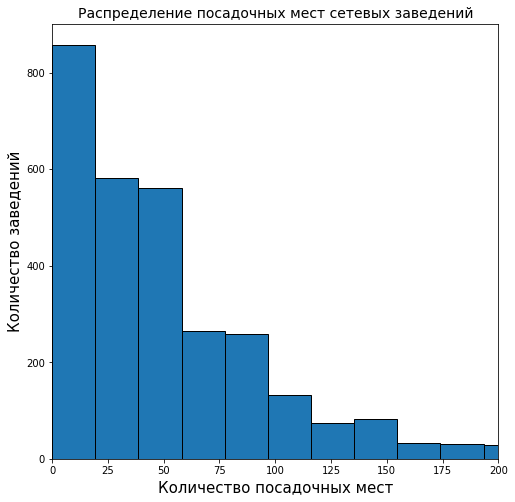

In [22]:
plt.subplots(figsize=(8, 8))
plt.hist(chain['number'], bins=30, ec='black')
plt.title('Распределение посадочных мест сетевых заведений', fontsize=14)
plt.xlim([0, 200])
plt.xlabel('Количество посадочных мест', fontsize=15)
plt.ylabel('Количество заведений', fontsize=15)
plt.show()

Большинство заведений укладываются в 100 посадочных мест, при этом видим резкое падение количества заведений после 60 посадочных мест. Также видим разницу разных типов заведений по количеству посадочных мест. В максимальные 60 мест укладываются кафе, предприятия быстрого обслуживания и рестораны, что является малым показателем для этих типов, если учитывать что в промежутке от 60 до 300 посадочных мест существует большое количество заведений этого типа. Остальные типы заведений имеют не более 30 посадочных мест. Поэтому можем заключить, что большинство сетевых заведений имеют небольшое количество посадочных мест.

<a id="analysis_1_6"></a> 
### Выделение улиц, топ 10 улиц по количеству заведений и их принадленость районам
[К оглавлению](#contents)

Добавим столбцы с городом и улицей, разделив столбец с адресом.

In [23]:
rest

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,сетевое,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,сетевое,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [24]:
rest['street'] = rest['address'].apply(lambda x: x.split(', ')[1])

In [25]:
rest

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,сетевое,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,сетевое,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский


In [26]:
rest['street'].nunique()

1900

In [27]:
districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
streetname    4398 non-null object
areaid        4398 non-null int64
okrug         4398 non-null object
area          4398 non-null object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


In [28]:
districts

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [29]:
rest['street'] = rest['street'].str.lower()
districts['streetname'] = districts['streetname'].str.lower()

In [30]:
rest.groupby('street')['object_name'].count().sort_values(ascending=False).head()

street
город зеленоград          232
проспект мира             204
профсоюзная улица         182
ленинградский проспект    171
пресненская набережная    167
Name: object_name, dtype: int64

Зеленоград и поселение сосенское всё же не будем включать в анализ, так как они не являются улицами Москвы.

In [31]:
top10 = rest[(rest['street']!='поселение сосенское') & (rest['street']!='город зеленоград')]\
.groupby('street')['object_name'].count().sort_values(ascending=False).reset_index()\
.rename(columns={'object_name' : 'object_count'}).head(10)

In [32]:
top10

,street,object_count
0,проспект мира,204
1,профсоюзная улица,182
2,ленинградский проспект,171
3,пресненская набережная,167
4,варшавское шоссе,161
5,ленинский проспект,147
6,проспект вернадского,132
7,кутузовский проспект,114
8,каширское шоссе,112
9,кировоградская улица,110


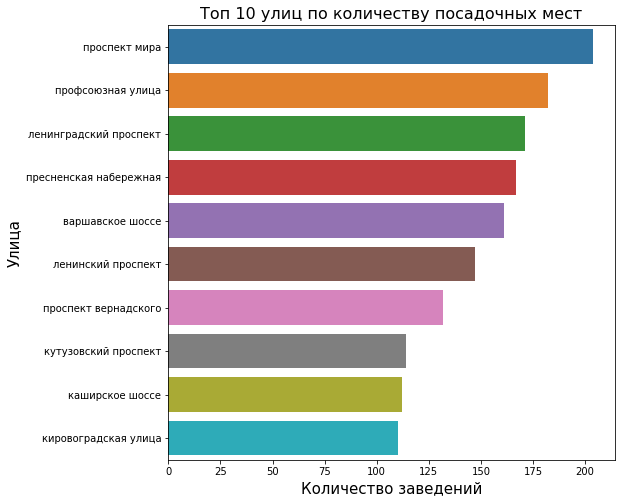

In [33]:
plt.subplots(figsize=(8, 8))
sns.barplot(x=top10['object_count'], y=top10['street'])
plt.title('Топ 10 улиц по количеству посадочных мест', fontsize=16)
plt.xlabel('Количество заведений', fontsize=15)
plt.ylabel('Улица', fontsize=15)
plt.show()

На первом месте по количеству заведений находится проспект мира с 204 заведениями. На втором месте профсоюзная улица с 182 заведениями, на третьем ленинградский проспект - 171 заведение. На трёх последних местах идут кутузовский проспект, каширское шоссе и кировоградская улица с примерно одним результатом в 110 - 115 заведений. Количество заведений на улицу зависит, вероятно, от протяжённости и близости к памятным местам. Но точно сказать сложно - это бы потребовало отдельного исследования.

In [34]:
top10_distr = top10.merge(districts, left_on='street', right_on='streetname', how='left')
top10_distr = top10_distr.drop(['object_count', 'streetname'], 1)
top10_distr[top10_distr['street']=='проспект мира'][['street','area']]

,street,area
0,проспект мира,Алексеевский район
1,проспект мира,Ярославский Район
2,проспект мира,Район Марьина роща
3,проспект мира,Останкинский район
4,проспект мира,Район Ростокино
5,проспект мира,Район Свиблово
6,проспект мира,Мещанский район


Построим сводную таблицу по улицам и районам для наглядности

In [35]:
top10_pivot = top10_distr.pivot_table(index=['street','area'])
del top10_pivot['areaid']
top10_pivot

Empty DataFrame
Columns: []
Index: [(варшавское шоссе, Донской район), (варшавское шоссе, Нагорный район), (варшавское шоссе, Район Нагатино-Садовники), (варшавское шоссе, Район Северное Бутово), (варшавское шоссе, Район Чертаново Северное), (варшавское шоссе, Район Чертаново Центральное), (варшавское шоссе, Район Чертаново Южное), (варшавское шоссе, Район Южное Бутово), (каширское шоссе, Район Москворечье-Сабурово), (каширское шоссе, Район Нагатино-Садовники), (каширское шоссе, Район Орехово-Борисово Северное), (каширское шоссе, Район Орехово-Борисово Южное), (кировоградская улица, Район Чертаново Северное), (кировоградская улица, Район Чертаново Центральное), (кировоградская улица, Район Чертаново Южное), (кутузовский проспект, Район Дорогомилово), (кутузовский проспект, Район Фили-Давыдково), (ленинградский проспект, Район Аэропорт), (ленинградский проспект, Район Беговой), (ленинградский проспект, Район Сокол), (ленинградский проспект, Хорошевский район), (ленинский проспект, Донской район), (ленинский проспект, Ломоносовский район), (ленинский проспект, Обручевский район), (ленинский проспект, Район Гагаринский), (ленинский проспект, Район Проспект Вернадского), (ленинский проспект, Район Теплый Стан), (ленинский проспект, Район Тропарево-Никулино), (ленинский проспект, Район Якиманка), (пресненская набережная, Пресненский район), (проспект вернадского, Ломоносовский район), (проспект вернадского, Район Гагаринский), (проспект вернадского, Район Проспект Вернадского), (проспект вернадского, Район Раменки), (проспект вернадского, Район Тропарево-Никулино), (проспект мира, Алексеевский район), (проспект мира, Мещанский район), (проспект мира, Останкинский район), (проспект мира, Район Марьина роща), (проспект мира, Район Ростокино), (проспект мира, Район Свиблово), (проспект мира, Ярославский Район), (профсоюзная улица, Академический район), (профсоюзная улица, Обручевский район), (профсоюзная улица, Район Коньково), (профсоюзная улица, Район Теплый Стан), (профсоюзная улица, Район Черемушки), (профсоюзная улица, Район Ясенево)]

<a id="analysis_1_7"></a> 
### Число улиц с одним объектом общественного питания:
[К оглавлению](#contents)

In [36]:
rest

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,несетевое,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица егора абакумова
1,77874,Родник,несетевое,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,Кафе «Академия»,несетевое,кафе,"город Москва, Абельмановская улица, дом 6",95,абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,сетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,Кафе «Вишневая метель»,несетевое,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,сетевое,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й крутицкий переулок
15362,209264,Шоколадница,сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица земляной вал
15363,209186,Шоколадница,сетевое,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица земляной вал
15364,221900,Шоколадница,сетевое,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение московский


In [37]:
objects_count = rest.groupby('street')['object_name'].count().reset_index().rename({'object_name':'object_count'})
one_object_streets = objects_count[objects_count['object_name']==1]
one_object_streets

,street,object_name
2,1-й балтийский переулок,1
3,1-й басманный переулок,1
4,1-й ботанический проезд,1
7,1-й вешняковский проезд,1
9,1-й голутвинский переулок,1
...,...,...
1889,ялтинская улица,1
1890,янтарный проезд,1
1895,ясногорская улица,1
1898,яузский бульвар,1


In [38]:
one_object_str_distr = one_object_streets.merge(districts, left_on='street', right_on='streetname', how='left')
one_object_str_distr

,street,object_name,streetname,areaid,okrug,area
0,1-й балтийский переулок,1,1-й балтийский переулок,54.0,САО,Район Аэропорт
1,1-й басманный переулок,1,1-й басманный переулок,13.0,ЦАО,Басманный район
2,1-й басманный переулок,1,1-й басманный переулок,15.0,ЦАО,Красносельский район
3,1-й ботанический проезд,1,1-й ботанический проезд,82.0,СВАО,Район Свиблово
4,1-й вешняковский проезд,1,1-й вешняковский проезд,120.0,ЮВАО,Рязанский район
...,...,...,...,...,...,...
617,ялтинская улица,1,ялтинская улица,104.0,ЮАО,Нагорный район
618,янтарный проезд,1,янтарный проезд,76.0,СВАО,Лосиноостровский район
619,ясногорская улица,1,ясногорская улица,134.0,ЮЗАО,Район Ясенево
620,яузский бульвар,1,яузский бульвар,18.0,ЦАО,Таганский район


In [39]:
print('Количество улиц с одним заведение:', len(one_object_streets))
print('')
print('Районы, на которых располагаются улицы с содним заведением: {}'.format(one_object_str_distr['area'].unique()))

Количество улиц с одним заведение: 579

Районы, на которых располагаются улицы с содним заведением: ['Район Аэропорт' 'Басманный район' 'Красносельский район'
 'Район Свиблово' 'Рязанский район' 'Район Якиманка' 'Район Хамовники'
 'Район Соколиная Гора' 'Даниловский район' 'Мещанский район'
 'Таганский район' 'Район Лефортово' 'Район Печатники' 'Район Сокольники'
 'Район Замоскворечье' 'Хорошевский район' 'Район Арбат'
 'Район Марьина роща' 'Алексеевский район' 'Район Текстильщики'
 'Район Ростокино' 'Район Раменки' 'Район Хорошево-Мневники'
 'Район Покровское-Стрешнево' 'Район Богородское' 'Нижегородский район'
 'Тверской район' 'Лосиноостровский район' 'Район Преображенское'
 'Район Ново-Переделкино' nan 'Район Измайлово' 'Район Северное Измайлово'
 'Район Восточное Измайлово' 'Район Беговой' 'Донской район'
 'Район Гольяново' 'Войковский Район' 'Савеловский район' 'Район Перово'
 'Район Филевский Парк' 'Район Чертаново Южное' 'Южнопортовый Район'
 'Головинский район' 'Район Южное Бу

Если судить по карте, эти улицы могут быть, в первую очередь, короткими либо иметь другие причины притяжения людей. Там уже располагаются поликлиники или другие места для решения каких-то повседневных задач. 

<a id="analysis_1_8"></a> 
### Распределение количества посадочных мест на улицах с большим количеством заведений.
[К оглавлению](#contents)

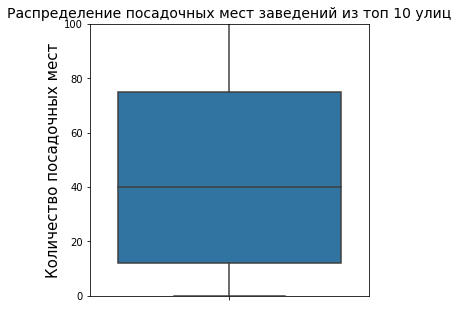

In [40]:
plt.subplots(figsize=(5, 5))
sns.boxplot(y='number', data=rest[rest['street'].isin(top10['street'])])
plt.title('Распределение посадочных мест заведений из топ 10 улиц', fontsize=14)
plt.ylabel('Количество посадочных мест', fontsize=15)
plt.xticks(rotation=45)
plt.ylim([0, 100])
plt.show()

Медиана посадочных мест - 40. Большиство значений укладываются в 10 - 75 посадочных мест.

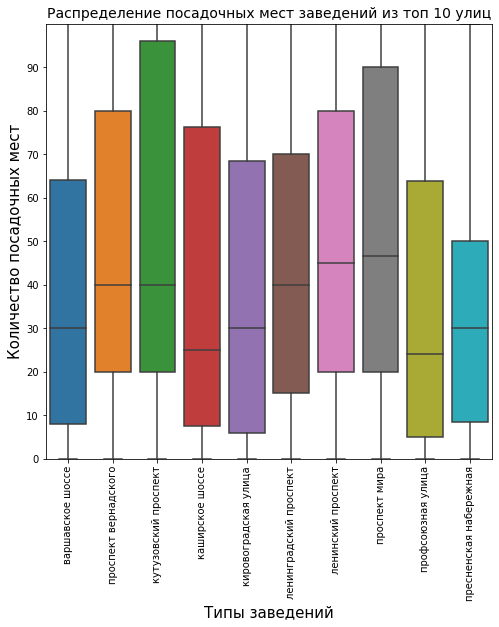

In [41]:
plt.subplots(figsize=(8, 8))
sns.boxplot(x='street', y='number', data=rest[rest['street'].isin(top10['street'])])
plt.title('Распределение посадочных мест заведений из топ 10 улиц', fontsize=14)
plt.xlabel('Типы заведений', fontsize=15)
plt.ylabel('Количество посадочных мест', fontsize=15)
plt.xticks(rotation=90)
plt.ylim([0, 100])
plt.yticks(np.arange(0, 100, step=10))
plt.show()

По всем заведениям медиана распределения посадочных мест находится на уровне 40, а основное количество заведений имеет 10 - 75 посадочных мест. Самая высокая медиана посадочных мест у проспекта вернадского, кутузовского проспекта, ленинградского проспекта, ленинского проспекта, проспекта мира в районе 40-45. На всех остальных улицах медиана не превышает 30.

<a id="conclusion"></a> 
# Выводы
[К оглавлению](#contents)

1. Перед нами стояла задача сделать обзор рынка маленких кафе, чтобы в дальнейшем этим можно было пользоваться при открытии собственного проекта
2. В нашем распоряжении были данные о заведениях общественного питания Москвы, в которых мы не нашли пропусков или дубликатов. Но заменили некоторые названия типов заведений на более короткие: предприятия быстрого обслуживания на фаст-фуд, и магазины (отдел кулинарии) на кулинарию. И в столбце принадлежности к сетевым заведения заменили значения "нет" и "да" на более полные, чтобы было проще работать с графиками.
3. В пункте анализа данных мы, в первую очередь, посмотрели на соотношение разных типов заведений. Наибольшее количество в районе 6000 занимают кафе, столовая и ресторан идут на третьем месте с результатами в 2500, фаст-фуд на четвёртом месте с  результатом в 2000, затем идут бары в количестве 600 и остальные заведения не поднимаются выше 500. 
   * Далее мы посмотрели на стооношение сетевых и несетевых заведений. Количество первых значительно превышает вторых: 12000 против 3000. Если говорить и разных типах заведений, то наибольший процент сетевых заведений мы обнаружили у фаст-фудов - 70 процентов, затем идут отдел кулинарии - 40  процентов, рестораны - 31 процент и кафе 30 процентов. У всех остальных заведений процент сетевых заведений не больше 19 процентов.
   * В следующем подпункте посмотрели на количество посадочных мест в разных типах заведений. У столовых самое широкое типичное распределение посадочных мест - 50 процентов значений укладываются в промежуток 50 - 200 посадочных мест, - при этом медиана укладывается в 100 посадочных мест - это самое высокое значение среди всех типов заведений. На втором месте идут рестораны с основным количеством посадочных мест в 45 - 115 и медианой - 80. У кафе, бара и буфета медиана - 30 посадочных мест. У кафе и бара количество посадочных мест варьируется в промежутке 15 -50. А буфеты могут достигать и 80 мест. При этом у закусочных и магазинов, по большей части нет посадочных мест или не больше 10. У фаст-фудов же количество посадочных мест не превышает 25, а медиана и вовсе на уровне 5
   * Далее посмотрели на распределения посадочных мест в сетевых заведениях. Большинство укладываются в 100 посадочных мест, при этом после 60 посадочных мест наблюдаем резкое падение. Также видим разницу разных типов заведений по количеству посадочных мест. В максимальные 60 мест укладываются кафе, предприятия быстрого обслуживания и рестораны, что является малым показателем для этих типов, если учитывать что в промежутке от 60 до 300 посадочных мест существует большое количество заведений этого типа. Остальные типы заведений имеют не более 30 посадочных мест. Поэтому можем заключить, что большинство сетевых заведений имеют небольшое количество посадочных мест.
   * В следующем шаге выделили топ10 улиц Москвы по количеству заведений. Список с количеством заведений представлен ниже. Далее посмотрели в каких районах Москвы эти улицы располагаются. Списки представлены ниже.
   * Затем обнаружили 579 улиц с одним заведением. И посмотрели районы в которых эти улицы располагаются. Список так же есть ниже.
   * И, наконец, посмотрели распределение посадочных мест для топ 10 улиц. По всем заведениям медиана распределения посадочных мест находится на уровне 40, а основное количество заведений имеет 10 - 75 посадочных мест. Самая высокая медиана посадочных мест у проспекта вернадского, кутузовского проспекта, ленинградского проспекта, ленинского проспекта, проспекта мира в районе 40-45. На всех остальных улицах медиана не превышает 30.

##### Рекомендации по открытию нового кафе: 
Из топ 10 улиц для открытия кафе лучше всего, по всей видимости, подойдут Ленинский проспект и проспект Вернадского, так как по количеству заведений эти улицы идут на 6 и 7 местах, то есть конкуренция будет не самой высокой. Но при этом рядом распологается МГУ, а интересная идея с роботами может заинтересовать студентов, которые рспространят сведения о кафе дальше. Кафе должно быть 30-40 мест, так как на этих улицах среднее количество мест у кафе 40, а по общей информации по всему городу - 30. Кафе находится на четвёртом месте по сетевому распространению. Всего сетевое распространение получили около 30 процентов кафе. Поэтому стоит ли открывать в дальнейшем ещё одно кафе под таким же именем требует более детального рассмотрения.

In [42]:
print('Топ 10 улиц по количеству заведений', top10)

Топ 10 улиц по количеству заведений                    street  object_count
0           проспект мира           204
1       профсоюзная улица           182
2  ленинградский проспект           171
3  пресненская набережная           167
4        варшавское шоссе           161
5      ленинский проспект           147
6    проспект вернадского           132
7    кутузовский проспект           114
8         каширское шоссе           112
9    кировоградская улица           110


In [43]:
display(top10_pivot)

Empty DataFrame
Columns: []
Index: [(варшавское шоссе, Донской район), (варшавское шоссе, Нагорный район), (варшавское шоссе, Район Нагатино-Садовники), (варшавское шоссе, Район Северное Бутово), (варшавское шоссе, Район Чертаново Северное), (варшавское шоссе, Район Чертаново Центральное), (варшавское шоссе, Район Чертаново Южное), (варшавское шоссе, Район Южное Бутово), (каширское шоссе, Район Москворечье-Сабурово), (каширское шоссе, Район Нагатино-Садовники), (каширское шоссе, Район Орехово-Борисово Северное), (каширское шоссе, Район Орехово-Борисово Южное), (кировоградская улица, Район Чертаново Северное), (кировоградская улица, Район Чертаново Центральное), (кировоградская улица, Район Чертаново Южное), (кутузовский проспект, Район Дорогомилово), (кутузовский проспект, Район Фили-Давыдково), (ленинградский проспект, Район Аэропорт), (ленинградский проспект, Район Беговой), (ленинградский проспект, Район Сокол), (ленинградский проспект, Хорошевский район), (ленинский проспект, Донской район), (ленинский проспект, Ломоносовский район), (ленинский проспект, Обручевский район), (ленинский проспект, Район Гагаринский), (ленинский проспект, Район Проспект Вернадского), (ленинский проспект, Район Теплый Стан), (ленинский проспект, Район Тропарево-Никулино), (ленинский проспект, Район Якиманка), (пресненская набережная, Пресненский район), (проспект вернадского, Ломоносовский район), (проспект вернадского, Район Гагаринский), (проспект вернадского, Район Проспект Вернадского), (проспект вернадского, Район Раменки), (проспект вернадского, Район Тропарево-Никулино), (проспект мира, Алексеевский район), (проспект мира, Мещанский район), (проспект мира, Останкинский район), (проспект мира, Район Марьина роща), (проспект мира, Район Ростокино), (проспект мира, Район Свиблово), (проспект мира, Ярославский Район), (профсоюзная улица, Академический район), (профсоюзная улица, Обручевский район), (профсоюзная улица, Район Коньково), (профсоюзная улица, Район Теплый Стан), (профсоюзная улица, Район Черемушки), (профсоюзная улица, Район Ясенево)]

In [44]:
print('Районы, на которых располагаются улицы с содним заведением: {}'.format(one_object_str_distr['area'].unique()))

Районы, на которых располагаются улицы с содним заведением: ['Район Аэропорт' 'Басманный район' 'Красносельский район'
 'Район Свиблово' 'Рязанский район' 'Район Якиманка' 'Район Хамовники'
 'Район Соколиная Гора' 'Даниловский район' 'Мещанский район'
 'Таганский район' 'Район Лефортово' 'Район Печатники' 'Район Сокольники'
 'Район Замоскворечье' 'Хорошевский район' 'Район Арбат'
 'Район Марьина роща' 'Алексеевский район' 'Район Текстильщики'
 'Район Ростокино' 'Район Раменки' 'Район Хорошево-Мневники'
 'Район Покровское-Стрешнево' 'Район Богородское' 'Нижегородский район'
 'Тверской район' 'Лосиноостровский район' 'Район Преображенское'
 'Район Ново-Переделкино' nan 'Район Измайлово' 'Район Северное Измайлово'
 'Район Восточное Измайлово' 'Район Беговой' 'Донской район'
 'Район Гольяново' 'Войковский Район' 'Савеловский район' 'Район Перово'
 'Район Филевский Парк' 'Район Чертаново Южное' 'Южнопортовый Район'
 'Головинский район' 'Район Южное Бутово' 'Останкинский район'
 'Район Сокол

<a id="presentation"></a>
## Презентация исследования

Новая презентация
https://drive.google.com/file/d/1i5zd_XbJaP4-Ts5gdZ1cXcxHk2IhCkqH/view?usp=sharing